# **Book Recommendation System - Proyek Akhir ML Terapan**
---
By : [Firda Aulia Rakhmah](https://www.dicoding.com/users/firda_aulia_rakhmah)

# **Project Overview**

**Latar Belakang Proyek**

Berkembangnya teknologi yang semakin pesat di era digital saat ini, akses terhadap berbagai jenis informasi semakin mudah, termasuk buku bagi para mereka yang gemar membaca. Sayangnya, dengan jumlah buku yang setiap tahunnya bertambah, seringkali pembaca menghadapi kesulitan dalam pemilihan buku yang susuai dengan minat dan kebutuhan mereka. Semakin banyak buku bukannya semakin memudahkan, malahan membuat pengambilan keputusan menjadi lebih rumit. Dengan memanfaatkan algoritma pembelajaran mesin dan analisis data yang mendalam, sistem rekomendasi buku hadir sebagai solusi untuk mengatasi masalah ini. Pembuatan sistem rekomendasi ini menggunakan metode content based filtering dan collaborative filtering.

<br>


**Tujuan proyek**

Proyek ini bertujuan untuk membangun model rekomendasi berbasis *Machine Learning* yang mampu membantu pembaca (readers) menemukan buku yang sesuai dengan minat, preferensi, dan kebutuhan mereka. Dengan menghadirkan rekomendasi yang lebih personal dan akurat, sistem ini diharapkan dapat meningkatkan pengalaman membaca pengguna. Selain itu, proyek ini juga berkontribusi pada pengembangan dunia literasi dengan mempermudah akses pembaca terhadap buku-buku berkualitas yang mungkin sebelumnya sulit ditemukan.

# **Data loading**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import library

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
import matplotlib.pyplot as plt

# **Data Understanding**

Data Understanding adalah tahap awal proyek untuk memahami data yang dimiliki. Berikut ini adalah informasi mengenai dataset yang digunakan sebagai bahan penyelesaian proyek.

<br>


| Jenis | Keterangan |
| ------ | ------ |
| Title | Book Recommendation Dataset |
| Source | [Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/code?datasetId=1004280&sortBy=relevance&language=Python) |
| Maintainer | [Möbius](https://www.kaggle.com/arashnic) |
| License | CC0: Public Domain |
| Visibility | Publik |
| Tags |Online Communities, Literature, Art, Recommender Systems, Culture and Humanities|
| Usability | 10.00 |

Membaca dataset yang akan digunakan

In [ ]:
df_b = pd.read_csv('/content/gdrive/MyDrive/2-Kuliah/Dicoding/Proyek Akhir/dataset/Books.csv')
df_r = pd.read_csv('/content/gdrive/MyDrive/2-Kuliah/Dicoding/Proyek Akhir/dataset/Ratings.csv')
df_u = pd.read_csv('/content/gdrive/MyDrive/2-Kuliah/Dicoding/Proyek Akhir/dataset/Users.csv')

<ipython-input-4-07b48d558f73>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b = pd.read_csv('/content/gdrive/MyDrive/2-Kuliah/Dicoding/Proyek Akhir/dataset/Books.csv')


## Melihat jumlah atribut pada masing-masing dataframe

In [ ]:
print(f'Jumlah data ISBN     : {len(df_b["ISBN"].unique())}')
print(f'Jumlah data Judul    : {len(df_b["Book-Title"].unique())}')
print(f'Jumlah data Penulis  : {len(df_b["Book-Author"].unique())}')
print(f'Jumlah data Penerbit : {len(df_b["Publisher"].unique())}')
print(f'Jumlah data Tahun    : {len(df_b["Year-Of-Publication"].unique())}')

print(f'=====' * 9)
print(f'Jumlah data Pembaca              : {len(df_r["User-ID"].unique())}')
print(f'Jumlah data Buku                 : {len(df_r["ISBN"].unique())}')
print(f'Jumlah data Rating yang diterima : {len(df_r)}')

print(f'=====' * 9)
print(f'Jumlah data User : {len(df_u)}')

Jumlah data ISBN     : 271360
Jumlah data Judul    : 242135
Jumlah data Penulis  : 102023
Jumlah data Penerbit : 16808
Jumlah data Tahun    : 202
Jumlah data Pembaca              : 105283
Jumlah data Buku                 : 340556
Jumlah data Rating yang diterima : 1149780
Jumlah data User : 278858


**Penjelasan :**

- **Jumlah data ISBN**: 271.360 ISBN unik, menunjukkan banyaknya buku yang terdaftar.
- **Jumlah data Judul**: 242.135 judul unik, beberapa buku memiliki lebih dari satu edisi.
- **Jumlah data Penulis**: 102.023 penulis unik, menunjukkan banyaknya kontribusi penulis.
- **Jumlah data Penerbit**: 16.808 penerbit berbeda.
- **Jumlah data Tahun**: 202 tahun penerbitan buku tercatat.
- **Jumlah data Pembaca**: 105.283 pembaca unik.
- **Jumlah data Buku (di rating)**: 340.556 buku yang diberi rating.
- **Jumlah data Rating**: 1.149.780 entri rating.

**Jumlah data User**: 278.858 pengguna unik.

## Univariate Exploratory Data Analysis (EDA)

EDA (Exploratory Data Analysis) adalah proses awal dalam analisis data yang bertujuan untuk memahami struktur, pola, dan karakteristik dataset secara mendalam sebelum melanjutkan ke tahap analisis lebih lanjut atau membangun model.

### Dataset Books.csv

In [ ]:
df_b

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


**Penjelasan :**

Dari dataframe yang di tampilkan di atas, kita dapat menyimpulkan bahwa pada dataset ini memiliki beberapa atribut (kolom) yang ada didalamnya. Berikut ini adalah penjelasan mengenai atribut dalam dataset Books :

- `ISBN` : Merupakan kode unik berupa 10 atau 13 digit yang digunakan untuk mengidentifikasi buku secara internasional. Setiap buku memiliki ISBN yang berbeda.
- `Book-Title` : Berisi judul buku yang dimasukkan dalam dataset. Judul ini digunakan untuk mengidentifikasi isi atau nama buku.
- `Book-Author` : Nama penulis buku. Bisa berupa satu penulis atau lebih jika buku ditulis oleh beberapa orang.
- `Year-of-Publication` : Tahun di mana buku diterbitkan untuk pertama kalinya. Informasi ini membantu menentukan usia buku dan relevansinya.
- `Publisher` : Nama penerbit yang bertanggung jawab atas publikasi buku tersebut. Penerbit biasanya mengelola produksi, distribusi, dan pemasaran buku.
- `Image-URL-S` : URL untuk gambar sampul buku dengan ukuran kecil. Biasanya digunakan untuk pratinjau cepat atau thumbnail.
- `Image-URL-M` : URL untuk gambar sampul buku dengan ukuran sedang. Cocok untuk tampilan standar pada aplikasi atau website.
- `Image-URL-L` : URL untuk gambar sampul buku dengan ukuran besar. Berguna untuk tampilan detail.

In [ ]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


**Penjelasan :**
- `RangeIndex` : Dataset memiliki 271,360 baris, dari indeks 0 hingga 271,359.
- `Data Columns` : Terdapat 8 kolom dalam dataset.
- `Non-Null Count` : Menunjukkan jumlah nilai yang tidak kosong dalam setiap kolom.
- `Dtype` : Menunjukan Tipe data dari setiap kolom.
-`Memory Usage` : Dataset menggunakan sekitar 16.6 MB memori di RAM.

### Dataset Ratings.csv

In [ ]:
df_r

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


**Penjelasan :**

Dari dataframe yang di tampilkan di atas, kita dapat menyimpulkan bahwa pada dataset ini memiliki beberapa atribut (kolom) yang ada didalamnya. Berikut ini adalah penjelasan mengenai atribut dalam dataset Ratings :

- `User-ID` : Menunjukkan ID unik yang diberikan kepada setiap pengguna yang memberikan rating untuk buku tertentu. Atribut ini digunakan untuk mengidentifikasi setiap pengguna dalam dataset.
- `ISBN` : Merupakan kode ISBN yang digunakan untuk mengidentifikasi setiap buku secara unik. Setiap ISBN merepresentasikan satu buku yang dapat dinilai oleh pengguna. Atribut ini membantu menghubungkan rating dengan buku yang relevan.
- `Book-Rating` : Merupakan rating yang diberikan oleh pengguna untuk buku tertentu. Nilai rating bervariasi dari 0 hingga 10, di mana nilai 0 kemungkinan menunjukkan buku yang belum dibaca atau tidak dinilai, sementara nilai yang lebih tinggi mencerminkan tingkat kepuasan pengguna terhadap buku tersebut.

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


**Penjelasan :**
- `RangeIndex` : Dataset memiliki 1,149,780 baris, dari indeks 0 hingga 1,149,779.
- `Data Columns` : TTerdapat 3 kolom dalam dataset.
- `Non-Null Count` : Menunjukkan jumlah nilai yang tidak kosong dalam setiap kolom. Semua kolom memiliki 1,149,780 nilai non-null, yang berarti tidak ada nilai yang hilang (NaN).
- `Dtype` : Menunjukan Tipe data dari setiap kolom.
-`Memory Usage` : Dataset menggunakan sekitar 26.3 MB memori di RAM.

In [ ]:
df_r.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


**Penjelasan :**

Deskripsi statistik untuk *dataframe* `Ratings` dengan atribut `Book-Rating`, yaitu untuk menampilkan karakteristik statistik, seperti rata-rata (`mean`), simpangan baku/standar deviasi (`std`), nilai minimum (`min`), nilai maksimum (`max`), kuartil bawah/Q1 (`25%`), kuartil tengah/Q2/median (`50%`), dan kuartil atas/Q3 (`75%`) dari *rating* pengguna terhadap buku yang sudah pernah dibaca.

In [ ]:
df_r['Book-Rating'].describe().apply(lambda x: '%.f' % x)

,Book-Rating
count,1149780
mean,3
std,4
min,0
25%,0
50%,0
75%,7
max,10


Visualisasi grafik histogram frekuensi sebaran data *rating* pengguna terhadap buku yang sudah pernah dibaca, dimulai dari *rating* terkecil yaitu 1 hingga *rating* terbesar yaitu 10.

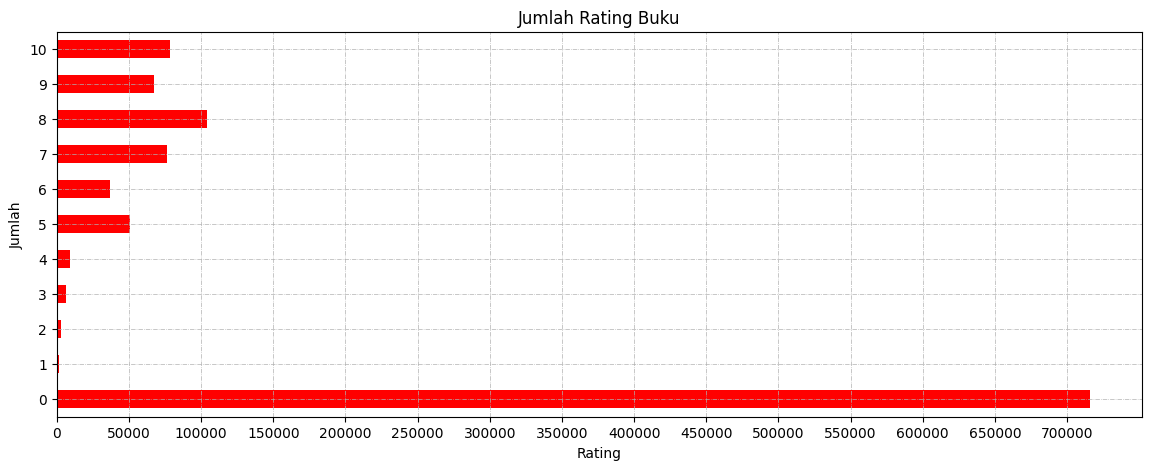

In [ ]:
df_r['Book-Rating'].value_counts().sort_index().plot(
    kind    = 'barh',
    color   = ['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r'],
    title   = 'Jumlah Rating Buku',
    xlabel  = 'Rating',
    ylabel  = 'Jumlah',
    figsize = (14, 5),
    xticks  = (np.arange(0, 720000, 50000))
).grid(linestyle='-.', linewidth=0.5)

**Penjelasan :**

Berdasarkan hasil visualisasi grafik histogram "Jumlah Rating Buku", dapat disimpulkan bahwa rating yang paling sering diberikan pada buku yang telah dibaca adalah rating 0, dengan jumlah sekitar lebih dari 700.000. Rating 0 ini dapat menimbulkan bias dan mempengaruhi hasil analisis, sehingga data dengan rating 0 sebaiknya dihapus pada tahap persiapan data.

### Dataset User

In [ ]:
df_u

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


**Penjelasan :**

Dari dataframe yang di tampilkan di atas, kita dapat menyimpulkan bahwa pada dataset ini memiliki beberapa atribut (kolom) yang ada didalamnya. Berikut ini adalah penjelasan mengenai atribut dalam dataset Users :

- `User-ID` : Menunjukan ID user
- `Location` : Lokasi dari user
- `Age` : Usia dari user

Dapat dilihat bahwa terdapat nilai `null` atau `NaN` (*Not a Number*) pada kolom/atribut `Age`. Sehingga perlu dilakukan pemrosesan lebih lanjut pada tahap *data preparation*.

In [ ]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


**Penjelasan :**
- `RangeIndex` : Dataset memiliki 278,858 baris, dari indeks 0 hingga 278,857.
- `Data Columns` : TTerdapat 3 kolom dalam dataset.
- `Non-Null Count` : Menunjukkan jumlah nilai yang tidak kosong dalam setiap kolom:
- `Dtype` : Menunjukan Tipe data dari setiap kolom.
-`Memory Usage` : Dataset menggunakan sekitar 6.4 MB memori di RAM.

In [ ]:
df_u.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


# **Data Preprocessing**

Data preprocessing adalah proses mempersiapkan data mentah agar siap digunakan untuk analisis lebih lanjut atau pelatihan model machine learning. Data yang diperoleh sering kali tidak dalam bentuk yang ideal untuk digunakan langsung. Oleh karena itu, preprocessing diperlukan untuk membersihkan, mengubah, dan menyusun data agar lebih sesuai dengan kebutuhan analisis atau algoritma yang akan digunakan. Dalam kasus ini, tahap *data preprocessing* dilakukan dengan menyesuaikan nama kolom atau atribut masing-masing *dataframe*, melakukan penggabungkan data ISBN, dan data *User* untuk melihat jumlah data secara keseluruhan.

## Rename nama kolom

Perubahan nama kolom bertujuan untuk memudahkan proses pemanggilan dataframe dengan nama kolom yang lebih mudah diingat.

### Books.csv

In [ ]:
df_b.rename(columns={
    'ISBN'                : 'isbn',
    'Book-Title'          : 'book_title',
    'Book-Author'         : 'book_author',
    'Year-Of-Publication' : 'pub_year',
    'Publisher'           : 'publisher',
    'Image-URL-S'         : 'image_s_url',
    'Image-URL-M'         : 'image_m_url',
    'Image-URL-L'         : 'image_l_url'
}, inplace=True)

df_b

,isbn,book_title,book_author,pub_year,publisher,image_s_url,image_m_url,image_l_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


### Ratings.csv

In [ ]:
df_r.rename(columns={
    'User-ID'     : 'user_id',
    'ISBN'        : 'isbn',
    'Book-Rating' : 'book_rating'
}, inplace=True)

df_r

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### Users.csv

In [ ]:
df_u.rename(columns={
    'User-ID'  : 'user_id',
    'Location' : 'location',
    'Age'      : 'age'
}, inplace=True)

df_u

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


## Penggabungan Data ISBN

Penggabungan data ISBN buku dilakukan dengan menggunakan fungsi `.concatenate` yang disediakan oleh *library* `numpy`. Data ISBN terdapat pada *dataframe* buku (`df_b`) dan *dataframe* *rating* (`df_r`), sehingga kedua data tersebut digabungkan berdasarkan kolom `isbn`.

In [ ]:
ISBNAll = np.concatenate((
    df_b.isbn.unique(),
    df_r.isbn.unique()
))

ISBNAll = np.sort(np.unique(ISBNAll))

print(f'Jumlah Buku berdasarkan ISBN : {len(ISBNAll)}')

Jumlah Buku berdasarkan ISBN : 341765


## Penggabungan Data User

Penggabungan data `user_id` buku dilakukan menggunakan fungsi `.concatenate` dengan bantuan *library* `numpy`. Data `user_id` terdapat pada *dataframe* *rating* (`df_r`) dan *dataframe* *user* (`df_u`), sehingga dilakukan penggabungan data tersebut pada atribut atau kolom `user_id`.

In [ ]:
UserAll = np.concatenate((
    df_r.user_id.unique(),
    df_u.user_id.unique()
))

UserAll = np.sort(np.unique(UserAll))

print(f'Jumlah Buku berdasarkan ISBN : {len(UserAll)}')

Jumlah Buku berdasarkan ISBN : 278858


# **Data Preparation**

Data Preparation adalah proses mengolah dan mempersiapkan data agar siap digunakan untuk analisis atau pelatihan model machine learning. Proses ini merupakan kelanjutan dari Data Understanding dan fokus utamanya adalah membersihkan, mengubah, dan menyusun data untuk meningkatkan kualitas serta relevansi data dengan kebutuhan analisis. Dalam kasus ini, tahap *data preparation* dilakukan dengan mengatasi *missing value*, pengecekan data duplikat, dan penggabungan data buku dan data *rating*.

## Missing value

Missing value adalah nilai yang hilang atau tidak ada dalam sebuah dataset. Hal ini terjadi ketika data tidak tersedia atau tidak tercatat untuk suatu entri atau atribut tertentu. Missing value sering ditemukan dalam berbagai bentuk, seperti kosong, NaN (Not a Number), atau null, dan bisa muncul karena berbagai alasan, seperti kesalahan pengumpulan data, ketidaksesuaian antara sumber data, atau kelalaian dalam pencatatan. Pengecekan *missing value* pada *dataframe* dapat dilakukan dengan menggunakan fungsi `.isnull().sum()`, yang akan menghasilkan total jumlah data yang kosong atau hilang (*missing*).

### Books.csv

In [ ]:
books = df_b
books.isnull().sum()

,0
isbn,0
book_title,0
book_author,2
pub_year,0
publisher,2
image_s_url,0
image_m_url,0
image_l_url,3


**Penjelasan:**

Berdasarkan deskripsi di atas, dapat dilihat bahwa pada *dataframe* `books` terdapat beberapa atribut yang memiliki nilai kosong atau *null*, yaitu pada kolom `book_author` sebanyak 2 data, `publisher` sebanyak 2 data, dan `image_l_url` sebanyak 3 data.

Oleh karena itu, data yang kosong tersebut dapat dihapus dengan menggunakan fungsi `.dropna()`. Setelah penghapusan, pengecekan ulang akan menunjukkan bahwa tidak ada lagi data yang kosong atau *null*.

In [ ]:
books = books.dropna()
books.isnull().sum()

,0
isbn,0
book_title,0
book_author,0
pub_year,0
publisher,0
image_s_url,0
image_m_url,0
image_l_url,0


### Ratings.csv

In [ ]:
ratings = df_r
ratings.isnull().sum()

,0
user_id,0
isbn,0
book_rating,0


**Penjelasan:**

Berdasarkan deskripsi di atas, dapat dilihat bahwa pada *dataframe* `ratings`, tidak ditemukan adanya nilai kosong atau *null* pada setiap kolom atau atributnya.

Namun, pada tahap *Univariate Exploratory Data Analysis* (EDA) sebelumnya, hasil visualisasi grafik histogram "Jumlah Rating Buku" menunjukkan bahwa sebagian besar data *rating* dari buku yang telah dibaca oleh *user* memiliki nilai 0, dengan jumlah lebih dari 700.000. *Rating* 0 ini dapat menyebabkan bias dalam analisis data, sehingga data dengan *rating* 0 perlu dihapus.

In [ ]:
print(f'Total Rating 0 : {ratings.book_rating.eq(0).sum()}')

ratings = ratings[df_r.book_rating > 0]

Total Rating 0 : 716109


**Penjelasan :**

Data dengan *rating* 0 ternyata sebanyak 716.109 data. Data tersebut tidak akan diikutsertakan ke dalam *dataframe*, sehingga data yang diambil adalah data *rating* yang lebih dari 0, yaitu *rating* 1 hingga *rating* 10 saja.

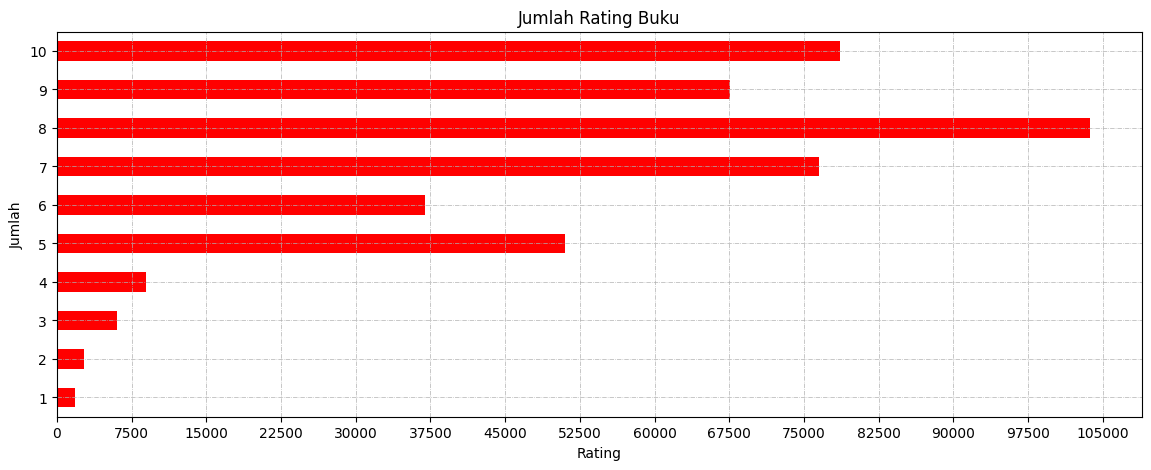

In [ ]:
ratings.book_rating.value_counts().sort_index().plot(
    kind    = 'barh',
    color   = ['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r'],
    title   = 'Jumlah Rating Buku',
    xlabel  = 'Rating',
    ylabel  = 'Jumlah',
    figsize = (14, 5),
    xticks  = (np.arange(0, 110000, 7500))
).grid(linestyle='-.', linewidth=0.5)

**Penjelasan :**

Berdasarkan hasil visualisasi grafik histogram di atas dengan *rating* 0 yang telah dihapus, dapat dilihat distribusi frekuensi data yang lebih rapi dan jelas, terutama pada data *rating* 1 hingga *rating* 4.

### Users.csv

In [ ]:
users = df_u
users.isnull().sum()

,0
user_id,0
location,0
age,110762


**Penjelasan :**

Dapat dilihat bahwa pada *dataframe* `users` terdapat atribut yang memiliki nilai kosong atau *null*, yaitu pada atribut `age` sebanyak 110.762 data.


Dengan begitu, data yang kosong tersebut dapat diganti atau diisi dengan nilai modus atau nilai yang paling sering muncul dalam data `age` tersebut dengan menggunakan fungsi `.fillna()` dan fungsi ` .mode()`.

In [ ]:
users.age = users.age.fillna(users.age.mode())
users.isnull().sum()

,0
user_id,0
location,0
age,110761


<Axes: >

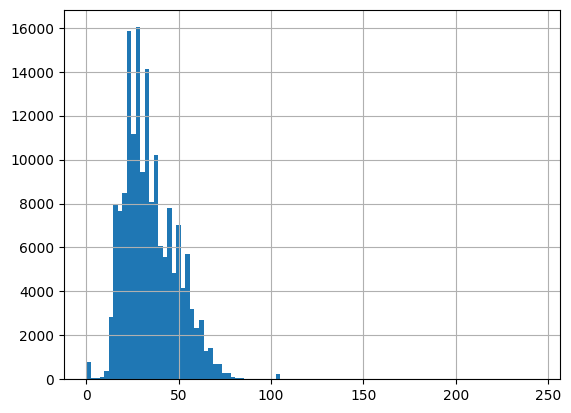

In [ ]:
users.age.hist(bins=100)

**Penjelasan :**

Berdasarkan hasil visualisasi grafik histogram umur *user* di atas dapat dilihat bahwa rentang umur *user* paling banyak berada pada umur 20 hingga 30-an.

## Duplicate data

Untuk memeriksa adanya data duplikat atau data yang sama dalam sebuah dataframe, kita dapat menggunakan fungsi .duplicated().sum().

In [ ]:
print(f'Jumlah data books  yang duplikat: {books.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')
print(f'Jumlah data users  yang duplikat: {users.duplicated().sum()}')

Jumlah data books  yang duplikat: 0
Jumlah data rating yang duplikat: 0
Jumlah data users  yang duplikat: 0


**Penjelasan :**

Berdasarkan data di atas, dapat dilihat bahwa tidak terdapat data buku, *rating*, dan *user* yang memiliki data duplikat.

## Menggabungkan Data Buku dan Rating

In [ ]:
books_ratings = pd.merge(ratings, books, on=['isbn'])
books_ratings

,user_id,isbn,book_rating,book_title,book_author,pub_year,publisher,image_s_url,image_m_url,image_l_url
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...
...,...,...,...,...,...,...,...,...,...,...
383832,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...
383833,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...
383834,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
383835,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


#**Modeling**

Tahap selanjutnya adalah proses *modeling* atau membuat model *machine learning* yang dapat digunakan sebagai sistem rekomendasi untuk menentukan rekomendasi buku yang terbaik kepada pengguna dengan beberapa algoritma sistem rekomendasi tertentu.

Berdasarkan tahap pemahaman data sebelumnya, terlihat bahwa jumlah data pada setiap *dataframe*—yaitu data buku, *rating*, dan *users*—tergolong sangat besar, mencapai ratusan ribu hingga jutaan entri. Hal ini dapat berpotensi meningkatkan biaya dan waktu yang diperlukan untuk proses pemodelan *machine learning*, serta membebani penggunaan *resource* seperti RAM atau GPU. Oleh karena itu, untuk efisiensi, dalam kasus ini data yang akan digunakan dalam pemodelan *machine learning* akan dibatasi menjadi 10.000 baris data buku dan 5.000 baris data *rating*.

Proses pemodelan yang akan dilakukan menggunakan content based filtering dan collaborative filtering.

In [ ]:
books   = books[:10000]
ratings = ratings[:5000]

## Content Based Filtering

Pada tahap inilah mengembangkan sistem rekomendasi dengan teknik content based filtering. Ingatlah, teknik content based filtering akan merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lalu. Pada tahap ini, akan menemukan representasi fitur penting dari setiap kategori masakan dengan tfidf vectorizer dan menghitung tingkat kesamaan dengan cosine similarity.

### TF-IDF Vectorizer

*Term Frequency Inverse Document Frequency Vectorizer* `TF-IDF Vectorizer` *Algorithm* merupakan algoritma yang dapat melakukan kalkulasi dan transformasi dari teks mentah menjadi representasi angka yang memiliki makna tertentu dalam bentuk matriks serta dapat digunakan dan dimengerti oleh model *machine learning*.

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(books.book_author)

TfidfVectorizer()

Proses transformasi data buku dengan atribut `book_author` ke dalam bentuk matriks dapat dilakukan dengan menggunakan fungsi `.fit_transform()`.

In [ ]:
tfidf_matrix = tfidf.fit_transform(books.book_author)
tfidf_matrix.shape

(10000, 5575)

**Penjelasan :**

Ukuran matriks yang dihasilkan dari transformasi tersebut adalah 10.000 data buku dan 5.575 data *author*.


Data di atas masih dalam bentuk vektor (dari *vectorizer*), sehingga perlu diubah ke dalam bentuk matriks dengan menggunakan fungsi `.todense()`.

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Untuk menampilkan matriks TF-IDF, matriks tersebut perlu diubah terlebih dahulu menjadi sebuah *dataframe* dengan kolom yang berisi nama *author* dan baris (*index*) yang berisi judul buku.

In [ ]:
# Melihat matriks TF-IDF

pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tfidf.get_feature_names_out(),
    index   = books.book_title
).sample(20, axis=1).sample(10, axis=0)

,paxson,roffey,florence,rash,schoemperlen,amanda,jackson,piers,trottier,sandri,shipman,marti,oriah,alford,ripley,ludington,hutsko,flaubert,dunford,carre
book_title,,,,,,,,,,,,,,,,,,,,
Misery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Experiment (Animorphs, No 28)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Children of Dune (Dune Chronicles, Book 3)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tick Tock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"One True Love? (Harlequin Flipside, No. 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moonlight Becomes You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Les Fleurs Du Mal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Orchid Fever: A Horticultural Tale of Love, Lust, and Lunacy (Vintage Departures)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Howl and Other Poems (Pocket Poets),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

Untuk melakukan perhitungan derajat kesamaan (*similarity degree*) antar judul buku dapat dilakukan dengan teknik *cosine similarity* menggunakan fungsi `cosine_similarity` dari library `sklearn`.

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Dengan teknik yang sama, untuk melihat *array* *cosine similarity* dapat diubah terlebih dahulu menjadi sebuah *dataframe*.

In [ ]:
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    columns = books.book_title,
    index   = books.book_title
)

print(f'Cosine Similarity Shape : {cosine_sim_df.shape}')

cosine_sim_df.sample(8, axis=1).sample(8, axis=0)

Cosine Similarity Shape : (10000, 10000)


book_title,Player Piano,"Das Kurze Leben Der Sophie Scholl (Fiction, Poetry and Drama)",Chicken Soup for the Pet Lover's Soul (Chicken Soup for the Soul),"Pillar of Light: A Historical Novel (Work and the Glory, Vol 1)","The Golden Compass (His Dark Materials, Book 1)",El Extranjero,Apocalypse Wow,Die Meute der Erben.
book_title,,,,,,,,
Seabiscuit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder at the Library of Congress,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gossip Hound,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Till We Have Faces: A Myth Retold,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Der Spion und der Analytiker.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Scarlet Letter (Penguin Popular Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Burning Marguerite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
River's End,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Recommendation testing

Mendefinisikan fungsi `author_recommendations` untuk menampilkan data buku yang direkomendasikan oleh algoritma sistem yang telah dibuat, dengan parameter masukan berupa judul buku yang sudah pernah dibaca oleh *user*.

In [ ]:
def author_recommendations(book_title, similarity_data=cosine_sim_df, items=books[['book_title', 'book_author']], k=10):
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
readed_book_title = 'Proxies'

In [ ]:
books[books.book_title.eq(readed_book_title)]

,isbn,book_title,book_author,pub_year,publisher,image_s_url,image_m_url,image_l_url
50,0812523873,Proxies,Laura J. Mixon,1999,Tor Books,http://images.amazon.com/images/P/0812523873.0...,http://images.amazon.com/images/P/0812523873.0...,http://images.amazon.com/images/P/0812523873.0...


Pada beberapa kasus, sistem rekomendasi akan memberikan rekomendasi buku yang terduplikat, sehingga perlu dilakukan penghapusan data judul buku rekomendasi yang terduplikat.

In [ ]:
author_recommendations(readed_book_title).drop_duplicates()

,book_title,book_author
0,Lethal Lover (Dangerous Men) (Harlequin Intrig...,Laura Gordon
1,"Last Writes (Levine, Laura, Jaine Austen Myste...",Laura Levine
2,Diary of a Mad Mom-To-Be,Laura Wolf
3,Diary of a Mad Bride (Summer Display Opportunity),Laura Wolf
4,The Law of Love,Laura Esquivel
8,Like Water for Chocolate: A Novel in Monthly I...,Laura Esquivel
9,Like Water for Chocolate: A Novel in Monthly I...,Laura Esquivel


**Penjelasan :**

Dapat dilihat bahwa sistem yang telah dibangun berhasil memberikan rekomendasi beberapa judul buku berdasarkan input atau masukan sebuah judul buku, yaitu "Proxies", dan diperoleh beberapa judul buku yang berdasarkan perhitungan sistem.

## Collaborative Filtering

Sistem rekomendasi penyaringan kolaboratif (*Collaborative Filtering Recommendation*) adalah teknik yang memberikan rekomendasi item berdasarkan preferensi pengguna di masa lalu, misalnya dengan menggunakan *rating* yang telah diberikan oleh pengguna, serta menyarankan item yang mirip dengan pola preferensi pengguna lainnya.

### Data Preparation

In [ ]:
# Melakukan encoding fitur user_id

user_ids = ratings.user_id.unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
print(user_ids)
print(user_to_user_encoded)
print(user_encoded_to_user)

[276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276804, 276808, 276811, 276812, 276813, 276814, 276820, 276822, 276827, 276828, 276830, 276832, 276835, 276837, 276842, 276847, 276848, 276850, 276853, 276854, 276857, 276859, 276861, 276862, 276863, 276866, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276949, 276953, 276954, 276957, 276959, 276964, 276965, 276984, 276986, 276988, 276990, 276992, 276994, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277023, 277028, 277031, 277032, 277036, 277042, 277048, 277051, 277052, 277053, 277056, 277058, 277065, 277072, 277074, 277079, 277085, 277087, 277090, 277094, 277096, 277107, 277109, 277116, 277124, 277128, 277129, 277134, 277135, 277139, 277143, 277157, 277159, 277165,

In [ ]:
# Melakukan encoding fitur ISBN

book_ids = ratings.isbn.unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [ ]:
print(book_ids)
print(book_to_book_encoded)
print(book_encoded_to_book)

['0155061224', '052165615X', '0521795028', '3257224281', '0600570967', '038550120X', '342310538', '0060517794', '0671537458', '0679776818', '0943066433', '1885408226', '0747558167', '3596218098', '0684867621', '0451166892', '8440682697', '0380711524', '3453092007', '3453213025', 'N3453124715', '9057868059', '0553572369', '3499230933', '3596151465', '3442136644', '8484330478', '8484332039', '2864322102', '8437606322', '8466300821', '8478442588', '0345443683', '043935806X', '055310666X', '0330332775', '0006379702', '3442131340', '3548603203', '1562827898', '0440498058', '0395547032', '0440414121', '8879839993', '8423996565', '8426449476', '8426449573', '8478884831', '8478885218', '8478885463', '8478886044', '0091830893', '0586207414', '0812571029', '0140260498', '0060096195', '0141310340', '0142302198', '0156006065', '0375821813', '038076041X', '0439401399', '0552546933', '0689804458', '0699854289', '0786812508', '0786817070', '0805057706', '1551925060', '1573248533', '000651118X', '2253

In [ ]:
# Memetakan user_id dan isbn kedalam dataframe

ratings['user'] = ratings.user_id.map(user_to_user_encoded)
ratings['book'] = ratings.isbn.map(book_to_book_encoded)

Melakukan pengecekan jumlah *user*, jumlah buku, dan *rating* minimal serta *rating* maksimal.

In [ ]:
num_users = len(user_encoded_to_user)
num_books = len(book_encoded_to_book)
print(num_users)
print(num_books)

min_ratings = min(ratings.book_rating)
max_ratings = max(ratings.book_rating)
print(f'Number of User: {num_users}, Number of Books: {num_books}, Min Rating: {min_ratings}, Max Rating: {max_ratings}')

1204
4565
Number of User: 1204, Number of Books: 4565, Min Rating: 1, Max Rating: 10


### Training data dan validasi data

Melakukan pengecekan terdahap *dataframe* `ratings` yang telah dilakukan pemetaan atribut atau kolom tambahan, yaitu `user` dan `book`. Selain itu, dilakukan juga pengacakan data dengan menggunakan fungsi `.sample(frac=1)`.

In [ ]:
ratings = ratings.sample(frac=1, random_state=412)
ratings

,user_id,isbn,book_rating,user,book
1554,277427,0375408886,9,200,681
1465,277427,0060542128,7,200,666
9656,81,0375410538,5,649,2307
4153,278257,0060194596,9,462,1728
4324,278411,0446608831,8,500,1825
...,...,...,...,...,...
820,277051,0385720920,10,98,380
629,276939,2253063339,9,70,269
12371,1167,038533656X,5,941,3478
2120,277478,0451459393,8,215,855


Melakukan pembagian *dataset* dengan rasio 80:20, yaitu 80% untuk data latih (*training data*) dan 20% untuk data uji (*validation data*).

In [ ]:
x = ratings[['user', 'book']].values
y = ratings['book_rating'].apply(lambda x: (x-min_ratings) / (max_ratings-min_ratings)).values

train_indices = int(0.8 * ratings.shape[0])

xTrain, xVal, yTrain, yVal = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 200  681]
 [ 200  666]
 [ 649 2307]
 ...
 [ 941 3478]
 [ 215  855]
 [1012 3676]] [0.88888889 0.66666667 0.44444444 ... 0.44444444 0.77777778 0.77777778]


### Model development dan training menggunakan RecommenderNet

Pada tahap pembuatan model akan menggunakan kelas `RecommenderNet` dengan [*keras model class*]

In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias      = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0])
        user_bias   = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias   = self.book_bias(inputs[:, 1])

        dot_user_book = tf.tensordot(user_vector, book_vector, 2)

        x = dot_user_book + user_bias + book_bias

        return tf.nn.sigmoid(x)

Kemudian pada proses *model compiling*, akan menggunakan `Adam optimizer`, `binary crossentropy loss function`, dan metrik `RMSE` (Root Mean Squared Error).

In [ ]:
model = RecommenderNet(num_users, num_books, 50)

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss      = BinaryCrossentropy(),
    metrics   = [RootMeanSquaredError()]
)

In [ ]:
# Pelatihan model atau model *training* dengan menggunakan fungsi .fit() dengan parameter batch_size sebesar 20, dan 30 epochs.

history = model.fit(
    x               = xTrain,
    y               = yTrain,
    batch_size      = 20,
    epochs          = 30,
    validation_data = (xVal, yVal),
)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.6910 - root_mean_squared_error: 0.3143 - val_loss: 0.6824 - val_root_mean_squared_error: 0.2964
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6082 - root_mean_squared_error: 0.2378 - val_loss: 0.6754 - val_root_mean_squared_error: 0.2904
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5664 - root_mean_squared_error: 0.1996 - val_loss: 0.6747 - val_root_mean_squared_error: 0.2898
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5680 - root_mean_squared_error: 0.1931 - val_loss: 0.6730 - val_root_mean_squared_error: 0.2883
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5625 - root_mean_squared_error: 0.1914 - val_loss: 0.6716 - val_root_mean_squared_error: 0.2871
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5563 - root_mean_squared_error: 0.1889 - val_loss: 0.6707 - val_root_mean_squared_error: 0.2863
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

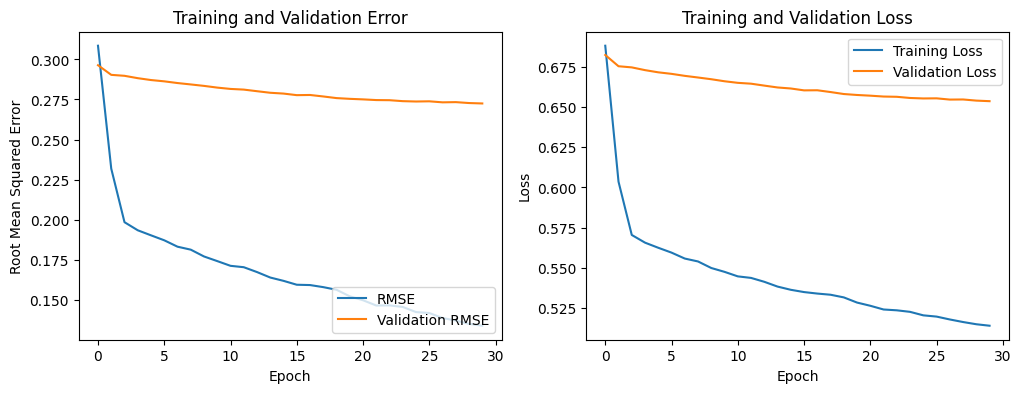

In [ ]:
# Melakukan visualisasi hasil *training* dan *validation* *error* serta *training* dan *validation* *loss* ke dalam grafik plot

rmse     = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss     = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(rmse,     label='RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.title('Training and Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss,     label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

### Recommendation Testing

In [ ]:
datasetBook   = books
datasetRating = ratings

Untuk mendapatkan rekomendasi buku dari sistem, kita perlu mengambil sampel data pengguna secara acak dan mendefinisikan variabel yang berisi daftar buku yang belum pernah dibaca oleh pengguna (`notReadedBooks`). Daftar ini akan menjadi buku-buku yang akan direkomendasikan. Untuk memperoleh daftar tersebut, kita dapat menggunakan operator logika bitwise [`~`] pada daftar buku yang sudah dibaca oleh pengguna (`readedBooks`).

In [ ]:
userId      = datasetRating.user_id.sample(1).iloc[0]
readedBooks = datasetRating[datasetRating.user_id == userId]

notReadedBooks = datasetBook[~datasetBook['isbn'].isin(readedBooks.isbn.values)]['isbn']
notReadedBooks = list(
    set(notReadedBooks).intersection(set(book_to_book_encoded.keys()))
)

notReadedBooks = [[book_to_book_encoded.get(x)] for x in notReadedBooks]
userEncoder    = user_to_user_encoded.get(userId)
userBookArray = np.hstack(
    ([[userEncoder]] * len(notReadedBooks), notReadedBooks)
)

Untuk mendapatkan hasil rekomendasi buku yang akan diberikan oleh sistem, dapat menggunakan fungsi `.predict()` dari *library* Keras.

In [ ]:
ratings = model.predict(userBookArray).flatten()

topRatingsIndices   = ratings.argsort()[-10:][::-1]
recommendedBookIds = [
    book_encoded_to_book.get(notReadedBooks[x][0]) for x in topRatingsIndices
]

print('Showing recommendations for users: {}'.format(userId))
print('=====' * 8)
print('Book with high ratings from user')
print('-----' * 8)

topBookUser = (
    readedBooks.sort_values(
        by = 'book_rating',
        ascending=False
    )
    .head(5)
    .isbn.values
)

bookDfRows = datasetBook[datasetBook['isbn'].isin(topBookUser)]
for row in bookDfRows.itertuples():
    print(row.book_title, ':', row.book_author)

print('=====' * 8)
print('Top 10 Books Recommendation')
print('-----' * 8)

recommended_resto = datasetBook[datasetBook['isbn'].isin(recommendedBookIds)]
for row in recommended_resto.itertuples():
    print(row.book_title, ':', row.book_author)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Showing recommendations for users: 278843
Book with high ratings from user
----------------------------------------
Divine Secrets of the Ya-Ya Sisterhood : A Novel : Rebecca Wells
Icy Sparks : Gwyn Hyman Rubio
The Bonesetter's Daughter : Amy Tan
The Things They Carried : TIM O'BRIEN
Top 10 Books Recommendation
----------------------------------------
To Kill a Mockingbird : Harper Lee
The Secret Life of Bees : Sue Monk Kidd
The Bean Trees : Barbara Kingsolver
Life of Pi : Yann Martel
Chasing the Dime : Michael Connelly
A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail) : Bill Bryson
The Cabinet of Curiosities : Douglas Preston
Wuthering Heights : Emily Bronte
The Visitor (Animorphs, No 2) : K. A. Applegate
The King of Torts : JOHN GRISHAM


**Penjelasan :**

Berdasarkan hasil di atas, dapat dilihat bahwa sistem akan mengambil pengguna secara acak, yaitu pengguna dengan `user_id` **278843**. Selanjutnya, sistem akan mencari buku dengan *rating* tertinggi dari pengguna tersebut, yaitu:

*   **Divine Secrets of the Ya-Ya Sisterhood : A Novel** oleh **Rebecca Wells**  
*   **Icy Sparks** oleh **Gwyn Hyman Rubio**  
*   **The Bonesetter's Daughter** oleh **Amy Tan**  
*   **The Things They Carried** oleh **Tim O'Brien**  

Kemudian, sistem akan membandingkan antara buku dengan *rating* tertinggi dari pengguna tersebut dan semua buku lainnya yang belum pernah dibaca, lalu mengurutkan buku yang akan direkomendasikan berdasarkan nilai prediksi rekomendasi tertinggi. Terdapat 10 daftar buku yang direkomendasikan oleh sistem, yaitu:

*   **To Kill a Mockingbird** oleh **Harper Lee**  
*   **The Secret Life of Bees** oleh **Sue Monk Kidd**  
*   **The Bean Trees** oleh **Barbara Kingsolver**  
*   **Life of Pi** oleh **Yann Martel**  
*   **Chasing the Dime** oleh **Michael Connelly**  
*   **A Walk in the Woods: Rediscovering America on the Appalachian Trail** oleh **Bill Bryson**  
*   **The Cabinet of Curiosities** oleh **Douglas Preston**  
*   **Wuthering Heights** oleh **Emily Bronte**  
*   **The Visitor (Animorphs, No 2)** oleh **K. A. Applegate**  
*   **The King of Torts** oleh **John Grisham**  

Dapat dibandingkan antara daftar ***Book with high ratings from user*** dan ***Top 10 Books Recommendation***, terdapat beberapa kesesuaian pola rekomendasi berdasarkan preferensi pengguna. Hal ini menunjukkan bahwa sistem yang dibangun dapat memberikan rekomendasi buku kepada pengguna dengan hasil yang relevan dan sesuai prediksi.

# **Kesimpulan**

Secara keseluruhan, model rekomendasi buku yang dikembangkan menggunakan pendekatan Content-based Recommendation dan Collaborative Filtering Recommendation telah berhasil diimplementasikan dan dapat memberikan rekomendasi yang sesuai dengan preferensi pengguna. Pada metode Collaborative Filtering, sistem memerlukan data rating dari pengguna untuk menghasilkan rekomendasi, sementara pada Content-based Filtering, data rating tidak diperlukan, karena sistem menganalisis atribut dari setiap buku untuk menentukan kecocokannya dengan preferensi pengguna. Dengan kedua pendekatan ini, sistem dapat memberikan rekomendasi yang lebih personal dan relevan bagi pengguna, berdasarkan interaksi mereka maupun karakteristik buku itu sendiri.